# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [73]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [74]:
mnist = fetch_openml('mnist_784')
X = mnist['data']
y = mnist['target'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [75]:
print(X.shape, y.shape) # 데이터셋을 호출하는 방법이 다른 것으로 보임.

(70000, 784) (70000,)


In [76]:
df = X
df['y'] = y
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [77]:
# # data를 각 픽셀에 이름붙여 표현 => 필요가 없어졌음
feat_cols = [ 'pixel'+str(i) for i in range(1, X.shape[1]) ]
# df = pd.DataFrame(X,columns=feat_cols)
# df.head()

In [78]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<Figure size 640x480 with 0 Axes>

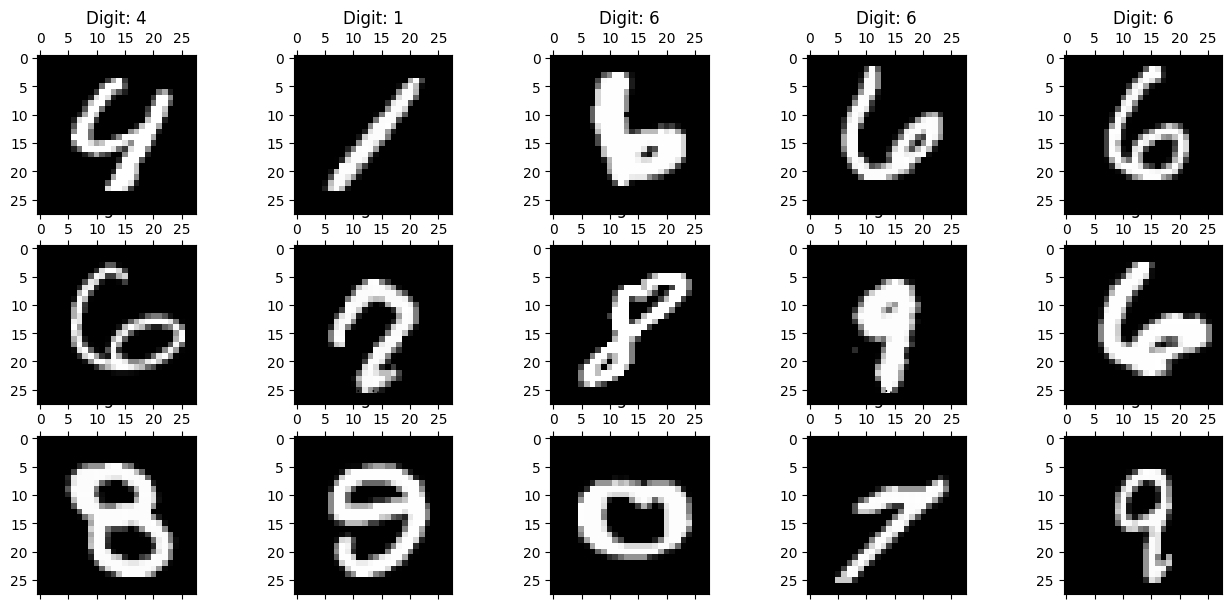

In [79]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis = 1), y, test_size = 0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
cov = PCA(n_components=X_std.shape[1])
cov.fit(X_std)

PCA(n_components=784)

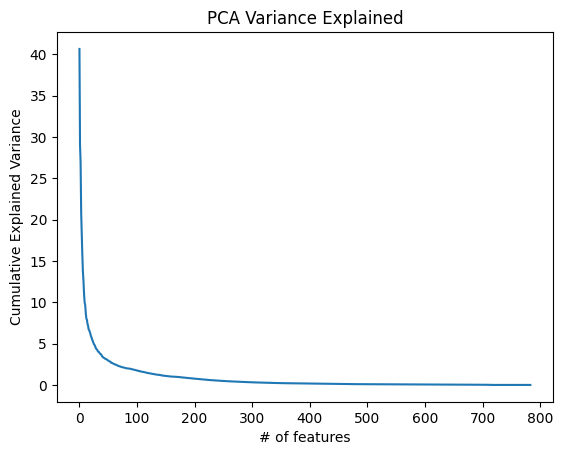

In [83]:
expVar = cov.explained_variance_
plt.xlabel('# of features')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.plot(expVar)
plt.show()

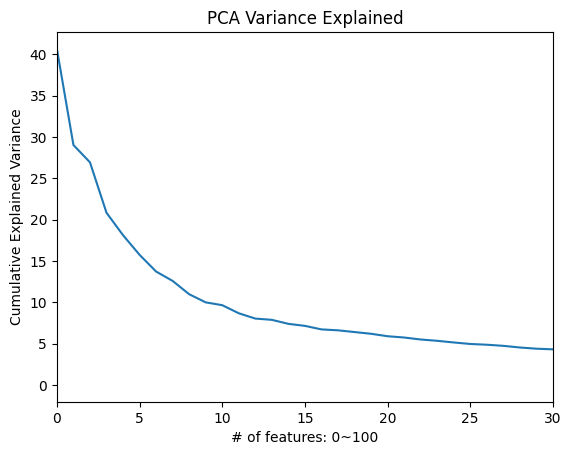

In [84]:
#0~30사이를 보겠다.
plt.xlabel('# of features: 0~100')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.xlim(0, 30)
plt.plot(expVar)
plt.show()

#n_components = 15로 설정.

In [85]:
model = PCA(n_components=15)
pca_features = model.fit_transform(X_std)

In [86]:
pca_features.shape

(56000, 15)

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X = X_std, y = y_train)
lda_features = lda.fit_transform(X_std, y_train)


In [88]:
lda_features.shape #784개의 feature가 9개의 feature로 감소했다.

(56000, 9)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [109]:
import time

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [110]:
model1 = Sequential()
model1.add(keras.Input(shape = (784,)))
model1.add(Dense(200, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))
model1.compile(loss=keras.losses.BinaryCrossentropy())

In [111]:
model1.fit(X_train, y_train)

ValueError: in user code:

    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((32, 10) vs (32, 1)).


In [ ]:
BATCH_SIZE = 128
EPOCHS = 15

In [ ]:
def train(model, train_loader):
  model.train()
  train_loss = 0
  correct = 0

  for image, label in train_loader:
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    prediction = output.max(1, keepdim = True)[1]
    correct += prediction.eq(label.view_as(prediction)).sum().item()
      
  train_loss /= len(train_loader)
  train_accuracy = 100. * correct / len(train_loader.dataset)
  return train_loss, train_accuracy

def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

def pred(model, test_loader):
  model.eval()
  pred_li = []

  with torch.no_grad():
    for image in test_loader:
      image = image.to(DEVICE)
      output = model(image)
      pred_li.append(output.cpu().numpy().argmax(axis=1))

  return np.concatenate(pred_li)

In [ ]:
'''
1. 원본데이터로 훈련할 네트워크 설명.

Net 설명:
feature 크기는 784 -> 392 -> 10 으로 Layer가 2개이다.
Dropout 비율 0.2, Kaiming Initialization을 적용했다.
'''
class MyNet1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        #여기에 layer들을 삽입
        self.linear1 = nn.Sequential(
            nn.Linear(28 * 28, 392),
            nn.BatchNorm1d(392),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.linear2 = nn.Sequential(
            nn.Linear(392, 10),
            nn.ReLU()
        )

    def _init_weight_(self):
        #여기에 각 layer마다.. weight initialization.
        for m in self.linear1:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
            
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.linear1(x)
        x = self.linear2(x)
        return x

model1 = MyNet1().to(DEVICE)
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  val_loss, val_accuracy = evaluate(model, val_loader)
  print(f"[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tVal Loss: {val_loss:.4f}, \tVal Accuracy: {val_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Val Loss': val_loss,
    'Val Accuracy': val_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Val Loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Val Accuracy'], label='Val Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

In [ ]:
'''
2. PCA로 훈련할 네트워크 설명.

Net 설명:
feature 크기는 15 -> 10 -> 10 으로 Layer가 2개이다.
Dropout 비율 0.2, Kaiming Initialization을 적용했다.
'''
class PCANet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        #여기에 layer들을 삽입
        self.linear1 = nn.Sequential(
            nn.Linear(15, 10),
            nn.BatchNorm1d(10),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.linear2 = nn.Sequential(
            nn.Linear(10, 10),
            nn.ReLU()
        )

    def _init_weight_(self):
        #여기에 각 layer마다.. weight initialization.
        for m in self.linear1:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
            
    def forward(self, x):
        x = x.view(-1, 15)
        x = self.linear1(x)
        x = self.linear2(x)
        return x

PCAmodel = PCANet().to(DEVICE)
optimizer = torch.optim.Adam(PCAmodel.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()


In [ ]:
'''
3. LDA로 훈련할 네트워크 설명.

Net 설명:
feature 크기는 9 -> 10 -> 10 으로 Layer가 2개이다.
Dropout 비율 0.2, Kaiming Initialization을 적용했다.
'''
class LDANet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        #여기에 layer들을 삽입
        self.linear1 = nn.Sequential(
            nn.Linear(9, 10),
            nn.BatchNorm1d(9),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.linear2 = nn.Sequential(
            nn.Linear(10, 10),
            nn.ReLU()
        )

    def _init_weight_(self):
        #여기에 각 layer마다.. weight initialization.
        for m in self.linear1:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
            
    def forward(self, x):
        x = x.view(-1, 9)
        x = self.linear1(x)
        x = self.linear2(x)
        return x

LDAmodel = LDANet().to(DEVICE)
optimizer = torch.optim.Adam(LDAmodel.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()


In [ ]:
#1. 원본데이터로 훈련
start = time.time()


특정한 틀 없이 자유롭게 해주시면 됩니다!